In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


In [2]:
train_dir="./imagess/train"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())
classes

Found 2592 images belonging to 6 classes.


['Aderajew', 'Betty', 'Biruk', 'Maddy', 'Tinsae', 'Yohannes']

### Model Architecture

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

c:\Users\Awerty\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,846 (952.52 KB)

 Trainable params: 243,270 (950.27 KB)

 Non-trainable params: 576 (2.25 KB)

### Train the model

In [5]:
model.fit(train_ds,epochs= 30, batch_size=32)

c:\Users\Awerty\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.6037 - loss: 1.0873
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7826 - loss: 0.4281
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8099 - loss: 0.3435
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8277 - loss: 0.2895
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8217 - loss: 0.2897
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8261 - loss: 0.2678
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8308 - loss: 0.2678
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.8359 - loss: 0.2503
Epoch 9/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.8327 - loss: 0.2510
Epoch 10/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.8150 - loss: 0.2464
Epoch 11/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8224 - loss: 0.2550
Epoch 12/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 

### Save the model

In [6]:
model.save("FR_model.keras")
model = load_model('FR_model.keras', compile=False)

### Export the model to SavedModel format

In [7]:
tf_model = load_model('FR_model.keras', compile=False)
# Export the model to SavedModel format
tf_model.export('saved_model_format')


# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_format')
tflite_model = converter.convert()
# Save the TFLite model
with open('FR_model_lite.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model converted to TFLite and saved as 'FR_model.keras'.")
tf_model.summary()

INFO:tensorflow:Assets written to: saved_model_format\assets


INFO:tensorflow:Assets written to: saved_model_format\assets


Saved artifact at 'saved_model_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1288929725520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929725904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929726480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929726672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929724752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929726096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929727440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929728592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929728976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929727056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1288929727824: TensorSpec(shape=(

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,846 (952.52 KB)

 Trainable params: 243,270 (950.27 KB)

 Non-trainable params: 576 (2.25 KB)

### Test the TFLite model

In [8]:

def test_tflite_model(image_path):
    print("Testing TFLite model...")

    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path="FR_model_lite.tflite")
    interpreter.allocate_tensors()
    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Preprocess the input image
    img = image.load_img(image_path, target_size=(224,224))
    input_data = np.expand_dims(image.img_to_array(img), axis=0).astype(np.float32)

    # Verify input shape and type
    print("Input shape:", input_data.shape)
    print("Expected shape:", input_details[0]['shape'])
    print("Input type:", input_data.dtype)
    print("Expected type:", input_details[0]['dtype'])

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the prediction
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print("Raw output:", output_data)  # Debug raw probabilities
    predicted_class = np.argmax(output_data)
    print(f"predictedIndex :{predicted_class}")
    print(f"Predicted class: {classes[predicted_class]}")

test_tflite_model("./images/test/betty/betty_7.jpg")
test_tflite_model("./images/test/Biruk/biruk_11.jpg")
test_tflite_model("./images/test/Biruk/biruk_6.jpg")
test_tflite_model("./images/test/betty/betty_2.jpg")
test_tflite_model("./images/test/Yohannes/yo_9.jpg")
test_tflite_model("./images/test/Tinsae/tin_11.jpg")
test_tflite_model("./images/test/Tinsae/tin_9.jpg")
test_tflite_model("./images/test/Yohannes/yo_16.jpg")
test_tflite_model("./images/test/Maedot/maddy_12.jpg")
test_tflite_model("./images/test/Aderajew/ade_4.jpg")




Testing TFLite model...
Input shape: (1, 224, 224, 3)
Expected shape: [  1 224 224   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[1.5617988e-02 1.3310082e-05 2.6254028e-03 4.8752055e-01 4.8328689e-01
  1.0935872e-02]]
predictedIndex :3
Predicted class: Maddy
Testing TFLite model...
Input shape: (1, 224, 224, 3)
Expected shape: [  1 224 224   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[2.5994375e-06 1.4808441e-13 6.4417542e-08 9.9999678e-01 5.2021079e-07
  8.3051383e-13]]
predictedIndex :3
Predicted class: Maddy
Testing TFLite model...
Input shape: (1, 224, 224, 3)
Expected shape: [  1 224 224   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[6.3018006e-04 3.4371009e-08 2.8073404e-03 3.7226176e-01 5.3161287e-01
  9.2687696e-02]]
predictedIndex :4
Predicted class: Tinsae
Testing TFLite model...
Input shape: (1, 224, 224, 3)
Expected shape: [  1 224 224   3]
Input type: float32
Expected type: <class

In [9]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Predicted: "+classes[np.argmax(pred)])

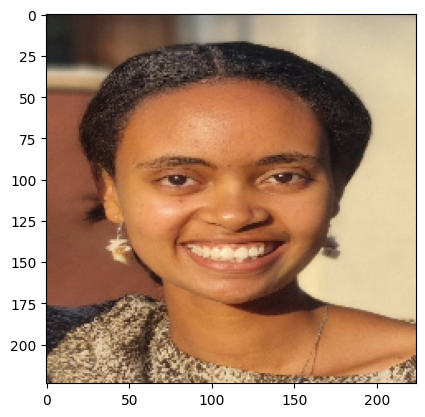

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
Predicted: Maddy


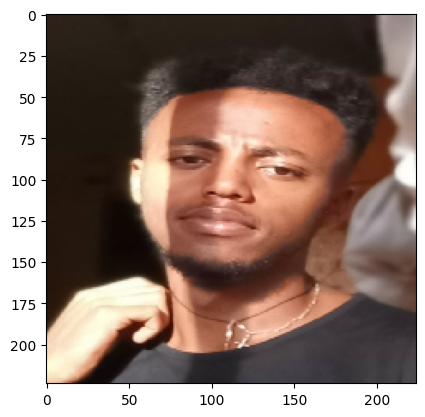

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted: Maddy


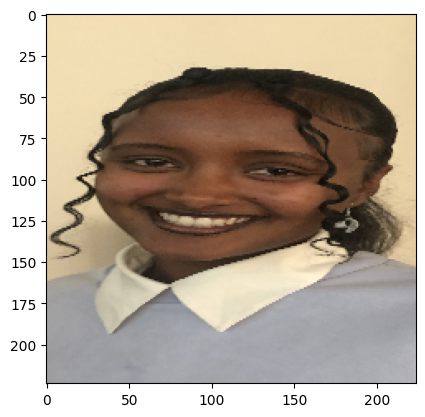

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted: Tinsae


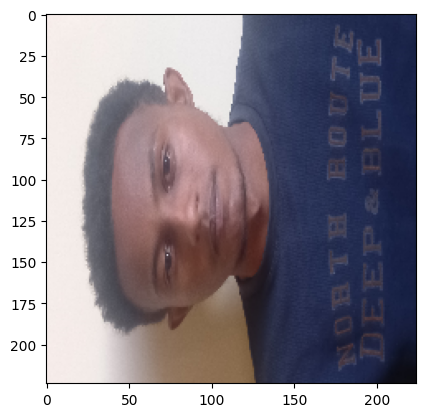

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted: Yohannes


In [10]:
predict_image("./images/test/Betty/betty_2.jpg")
predict_image("./images/test/Biruk/biruk_11.jpg")
predict_image("./images/test/Tinsae/tin_11.jpg")
predict_image("./images/test/Yohannes/yo_16.jpg")